##*Data Exploration*

*Importing libraries and packages*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as se
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## *Mounting drive and importing data*

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train=pd.read_csv('/content/gdrive/My Drive/Babra/train_values.csv')
labels=pd.read_csv('/content/gdrive/My Drive/Babra/train_labels.csv')
test=pd.read_csv('/content/gdrive/My Drive/Babra/test_values.csv')


#*Checking data values*

In [ ]:
labels.head(3)


,row_id,accepted
0,0,1
1,1,0
2,2,1


In [ ]:
train.head(3)

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False


In [ ]:
train.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,460052.000000,477535.000000,477534.000000,477560.000000,477486.000000,477435.000000,477470.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,181.606972,23.726924,144.542062,2.036228,4.786586,1.462374,102.389521,5416.833956,31.617310,69235.603298,91.832624,1427.718282,1886.147065,3720.121344
std,144337.711634,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,138.464169,15.982768,100.243612,0.511351,1.024927,0.677685,153.534496,2728.144999,26.333938,14810.058791,14.210924,737.559511,914.123744,1838.313175
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,0.534000,17858.000000,3.981000,4.000000,1.000000,0.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,2.000000,5.000000,1.000000,47.000000,3744.000000,10.700000,59731.000000,88.067250,944.000000,1301.000000,2442.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,2.000000,5.000000,1.000000,74.000000,4975.000000,22.901000,67526.000000,100.000000,1327.000000,1753.000000,3731.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,2.000000,5.000000,2.000000,117.000000,6467.000000,46.020000,75351.000000,100.000000,1780.000000,2309.000000,5436.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,4.000000,7.000000,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000


#Step 1. Describe missing data, provide summary of missing data. Count of missing data/percent per variable, type of missing data (NA, null), total percent of missing data per dataset

---



---




In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   row_id                          500000 non-null  int64  
 1   loan_type                       500000 non-null  int64  
 2   property_type                   500000 non-null  int64  
 3   loan_purpose                    500000 non-null  int64  
 4   occupancy                       500000 non-null  int64  
 5   loan_amount                     500000 non-null  float64
 6   preapproval                     500000 non-null  int64  
 7   msa_md                          500000 non-null  int64  
 8   state_code                      500000 non-null  int64  
 9   county_code                     500000 non-null  int64  
 10  applicant_ethnicity             500000 non-null  int64  
 11  applicant_race                  500000 non-null  int64  
 12  applicant_sex   

In [ ]:
missing=train.isnull().sum()
missing

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
dtype: int64

In [ ]:
percent_missing=missing/len(train)*100
percent_missing

row_id                            0.0000
loan_type                         0.0000
property_type                     0.0000
loan_purpose                      0.0000
occupancy                         0.0000
loan_amount                       0.0000
preapproval                       0.0000
msa_md                            0.0000
state_code                        0.0000
county_code                       0.0000
applicant_ethnicity               0.0000
applicant_race                    0.0000
applicant_sex                     0.0000
applicant_income                  7.9896
population                        4.4930
minority_population_pct           4.4932
ffiecmedian_family_income         4.4880
tract_to_msa_md_income_pct        4.5028
number_of_owner-occupied_units    4.5130
number_of_1_to_4_family_units     4.5060
lender                            0.0000
co_applicant                      0.0000
dtype: float64

In [ ]:
totat_percent_missing=missing.sum()/train.count().sum()*100
totat_percent_missing

1.6159523003634526

Investigating the whole dataset, we found that some variables contained missing data. With the info method for pandas, we can literarily see those variable. The dataset contained 500000 observations however, the following variables have incomplete data observations.

* aplicant_income                460052 non-null  float64 (39948 null)

* population                      477535 non-null  float64 (22465 null)

* minority_population_pct         477534 non-null  float64 (22466 null)

* ffiecmedian_family_income       477560 non-null  float64 (22440 null)

*  tract_to_msa_md_income_pct      477486 non-null  float64 (22514 null)

* number_of_owner-occupied_units  477435 non-null  float64 (22565 null)

* number_of_1_to_4_family_units   477470 non-null  float64 (22530 null) 

The percentages of missing data for these variables are:

* aplicant_income                7.9896

* population                      4.4930

* minority_population_pct         4.4932

* ffiecmedian_family_income       4.4880

*  tract_to_msa_md_income_pct      4.5028

* number_of_owner-occupied_units  4.5130

* number_of_1_to_4_family_units   4.5060
  
The total percentages of missing data for the whole dataset is: 1.62
   

#Step 2. Plot visualization of missing data pattern. Describe these observed patterns.





---


---


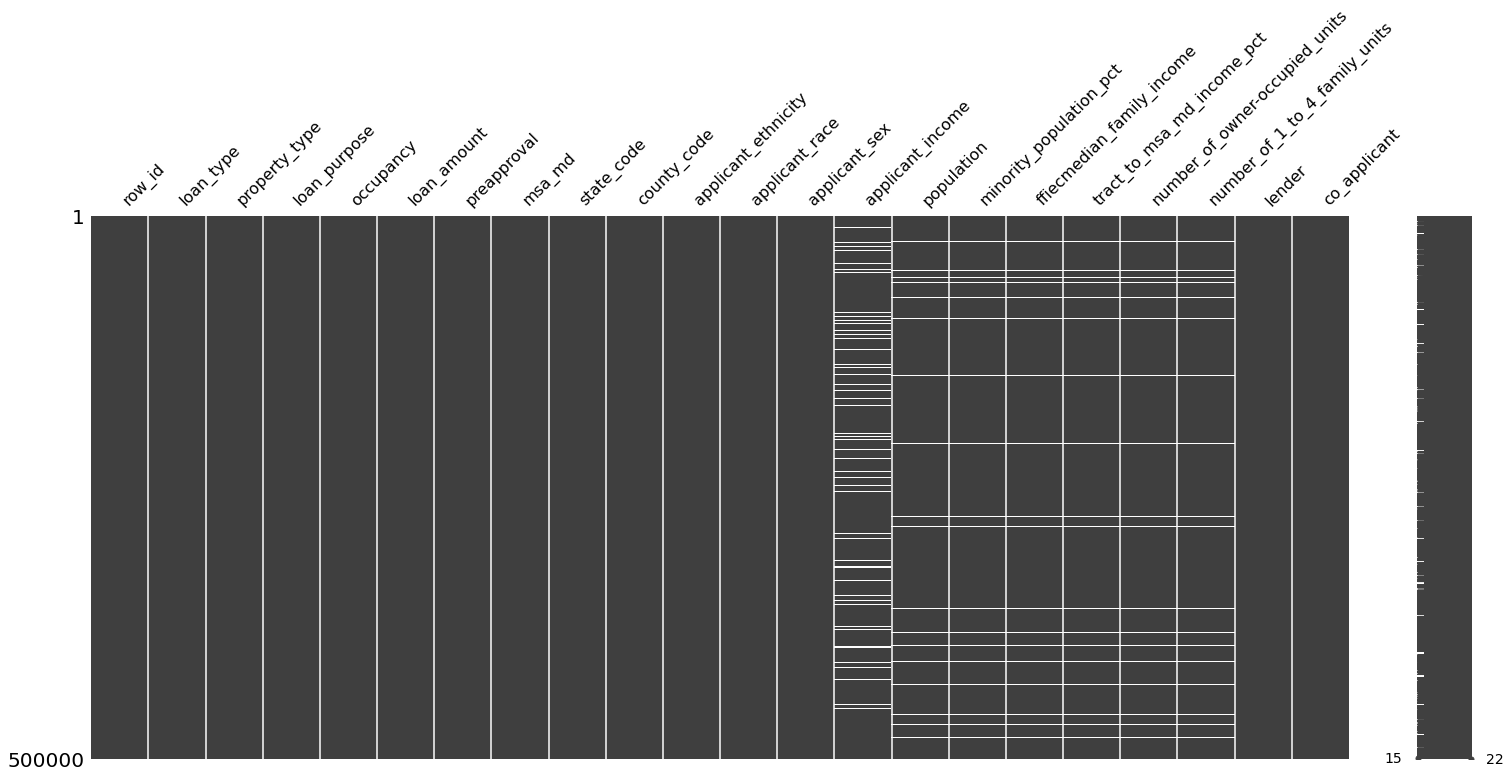

In [ ]:
import missingno as msno
%matplotlib inline
msno.matrix(train)

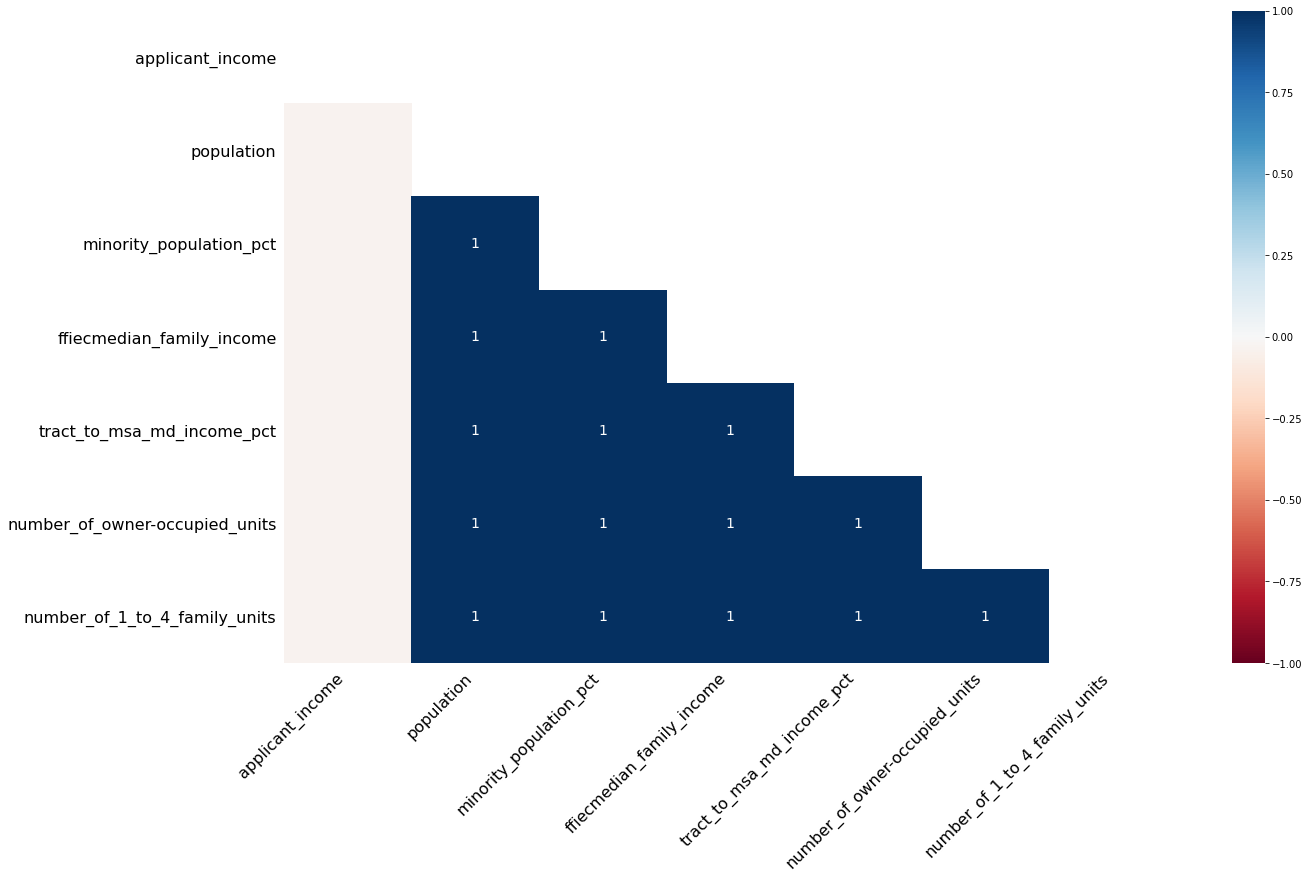

In [ ]:
msno.heatmap(train)


For the visualization of the missing values, the missingno library was imported.
White lines indicate missing values. "aplicant_income", "population",      " minority_population_pct", "ffiecmedian_family_income", "tract_to_msa_md_income_pct", "number_of_owner-occupied_units",and "number_of_1_to_4_family_units"  contained white lines as we expect. But, there is an interesting trend in the other columns that have missing values. They mostly have missing values in common rows. This is highly valuable information when handling missing values. Missingno library also provides heatmaps that show if there is any correlation between missing values in different columns. The highest correlation is 1, This confirms our intuition from the missing values matrix as these columns have missing values in the same rows except for applicant income. 


#Step 3. Explain type of correction performed: list-wise/pair-wise deletions, mean imputation, regression imputation. Complete discussion of findings, observations and corrections.


---



---


The possiblity of regression imputatuion is high if we can paerfectly capture the reltionship of all the cloumns with missing data. The dataset rows where applicant income columun have missing data will have to be deleted since it doesn't relate with other columns with missing data. Generally, less than 2 percent of the whole data and around 5 percent of individual variables have missing data. A carefree approach is to delete the whole missing value rows from the dataset. Predicition and insights will still be presevered in 90 percent of the dataset.